# YOLOv8 Image Segmentation

## Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/YOLOV8/4_image_segmentation

/content/drive/MyDrive/YOLOV8/4_image_segmentation


In [ ]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


## Test - Prediction

In [ ]:
!yolo segment predict model=yolov8n-seg.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.73M/6.73M [00:00<00:00, 159MB/s]
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

100% 476k/476k [00:00<00:00, 103MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/YOLOV8/4_image_segmentation/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 195.6ms
Speed: 15.1ms preprocess, 195.6ms inference, 1035.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Training

In [ ]:
!unzip data/car_part_dataset.zip -d data

Archive:  data/car_part_dataset.zip
   creating: data/car_part_dataset/images/
   creating: data/car_part_dataset/images/test/
  inflating: data/car_part_dataset/images/test/1.jpg  
  inflating: data/car_part_dataset/images/test/1004.jpg  
  inflating: data/car_part_dataset/images/test/1008.jpg  
  inflating: data/car_part_dataset/images/test/1016.jpg  
  inflating: data/car_part_dataset/images/test/1028.jpg  
  inflating: data/car_part_dataset/images/test/1035.jpg  
  inflating: data/car_part_dataset/images/test/1040.jpg  
  inflating: data/car_part_dataset/images/test/1050.jpg  
  inflating: data/car_part_dataset/images/test/1058.jpg  
  inflating: data/car_part_dataset/images/test/1088.jpg  
  inflating: data/car_part_dataset/images/test/1098.jpg  
  inflating: data/car_part_dataset/images/test/1110.jpg  
  inflating: data/car_part_dataset/images/test/1120.jpg  
  inflating: data/car_part_dataset/images/test/113.jpg  
  inflating: data/car_part_dataset/images/test/1130.jpg  
  infla

In [ ]:
!yolo segment train data=data/config.yaml model=yolov8n-seg.pt epochs=25 imgsz=640 workers = 8 batch=8 device=0 name=yolov8_car_part_segmentation

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data/config.yaml, epochs=25, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_car_part_segmentation6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

In [ ]:
# if interrupted
!yolo segment train model=".../last.pt" resume=True

## Test - Prediction

In [ ]:
!yolo segment predict model=runs/segment/yolov8_car_part_segmentation6/weights/best.pt source='data/car_part_dataset/images/test' save=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259819 parameters, 0 gradients, 12.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/176 /content/drive/MyDrive/YOLOV8/4_image_segmentation/data/car_part_dataset/images/test/1.jpg: 640x640 1 back_bumper, 2 back_doors, 1 back_glass, 2 back_lights, 1 front_door, 16.4ms
image 2/176 /content/drive/MyDrive/YOLOV8/4_image_segmentation/data/car_part_dataset/images/test/1004.jpg: 640x640 1 back_bumper, 1 back_glass, 2 back_lights, 9.6ms
image 3/176 /content/drive/MyDrive/YOLOV8/4_image_segmentation/data/car_part_dataset/images/test/1008.jpg: 640x640 1 front_bumper, 1 front_glass, 2 front_lights, 1 hood, 14.9ms
image 4/176 /content/drive/MyDrive/YOLOV8/4_image_segmentation/data/car_part_dataset/images/test/1016.jpg: 640x640 1 back_bumper, 1 back_glass, 2 back_lights, 13.5ms
image 5/176 /content/drive/MyDrive/YOLOV8/4_image_segmentation/data/car_part_dataset

In [ ]:
import cv2
import numpy as np
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


In [27]:
def extract_data(img, model):
  h,w,ch = img.shape
  results = model.predict(source=img.copy(), save=False, save_txt=False)
  result = results[0]
  seg_contour_idx = []

  for seg in result.masks.xyn:
    seg[:,0] = seg[:,0] * w
    seg[:,1] = seg[:,1] * h
    segment = np.array(seg, dtype=np.int32)
    seg_contour_idx.append(segment)

  bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
  class_ids = np.array(result.boxes.cls.cpu(), dtype="int")
  scores = np.array(result.boxes.conf.cpu(), dtype="float").round(2)
  class_names = result.names

  return bboxes, class_ids, seg_contour_idx, scores, class_names


0: 640x640 1 back_door, 2 back_lights, 1 front_bumper, 1 front_door, 1 front_glass, 1 front_light, 1 hood, 10.7ms
Speed: 3.3ms preprocess, 10.7ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 640)


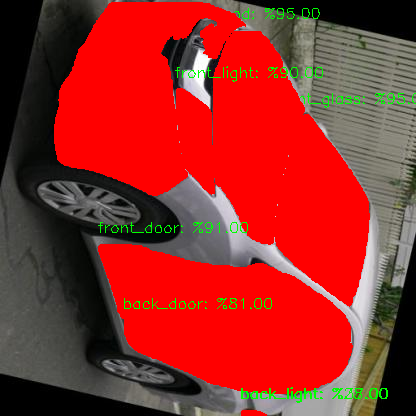

In [41]:
img_path = "data/car_part_dataset/images/test/113.jpg"
model_path = "runs/segment/yolov8_car_part_segmentation6/weights/best.pt"
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.imread(img_path)
img = imutils.resize(img, width=416)
model = YOLO(model_path)

bboxes, class_ids, seg_contour_idx, scores, class_names = extract_data(img, model)

for box, class_id, segmentation_id, score in zip(bboxes, class_ids, seg_contour_idx, scores):
  (xmin,ymin,xmax,ymax) = box

  # cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (0,255,0), 2)
  # cv2.polylines(img, [segmentation_id], True, (255,0,0), 2)
  cv2.fillPoly(img, pts=[segmentation_id], color=((0,0,255)))

  class_name = class_names[class_id]
  score = score * 100
  text = f"{class_name}: %{score:.2f}"

  cv2.putText(img, str(text), (xmin,ymin-10), font, 0.5, (0,255,0), 1)

cv2_imshow(img)



